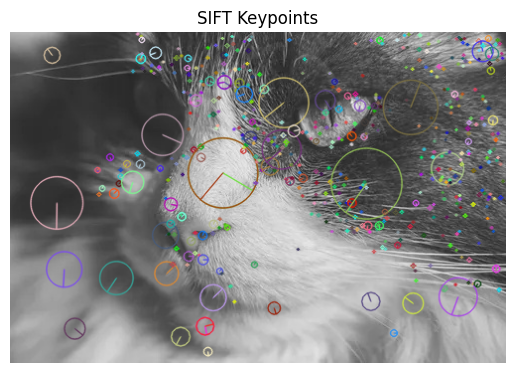

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('grayscale_image.jpg', cv2.IMREAD_GRAYSCALE)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None,
                                       flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show the result
plt.imshow(img_with_keypoints, cmap='gray')
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()


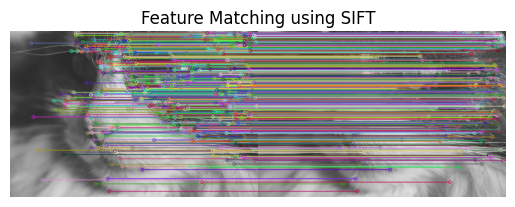

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load two images
img1 = cv2.imread('grayscale_image.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image_converted.jpg', cv2.IMREAD_GRAYSCALE)

# Detect SIFT features
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use BFMatcher for feature matching
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])

# Draw matches
matched_img = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)
plt.imshow(matched_img)
plt.title("Feature Matching using SIFT")
plt.axis('off')
plt.show()
